In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
link = '/content/drive/MyDrive/Alura_ciencia_e_dados/Avancando_em_Data_Science_com_Python/Data_visualization_graficos_de_comparacao_e_distribuicao/dados/relatorio_vendas.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
vendas = pd.read_csv(link)

In [5]:
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [6]:
# tranformando dados
vendas["data_pedido"] = pd.to_datetime(vendas['data_pedido'],format="%Y-%m-%d")

vendas["data_envio"] = pd.to_datetime(vendas['data_envio'],format="%Y-%m-%d")

In [7]:
# verificando so tipos de dados e se existem dados nulos
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [8]:
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[["data_pedido","vendas"]]

In [9]:
df_vendas_ano

,data_pedido,vendas
0,2018-11-09,890.66
1,2018-11-09,2488.59
2,2018-06-13,49.72
3,2017-10-12,3255.75
4,2017-10-12,76.04
...,...,...
8935,2018-09-30,123.22
8936,2019-11-18,271.97
8937,2019-11-18,700.75
8938,2016-01-22,85.83


In [10]:
# criando uma coluna ano
df_vendas_ano['ano'] = df_vendas_ano.data_pedido.dt.year

In [11]:
# excluindo coluna data
df_vendas_ano.drop(labels = "data_pedido",axis =1, inplace=True)

In [12]:
df_vendas_ano = pd.DataFrame(df_vendas_ano)

In [13]:
# Agrupando os dados por ano
df_vendas_ano = df_vendas_ano.groupby('ano')['vendas'].sum()
# ou pode usar -> df_vendas_ano.groupby(["ano"]).aggregate("sum")

In [14]:
df_vendas_ano = df_vendas_ano.to_frame()


In [15]:
df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


In [16]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'


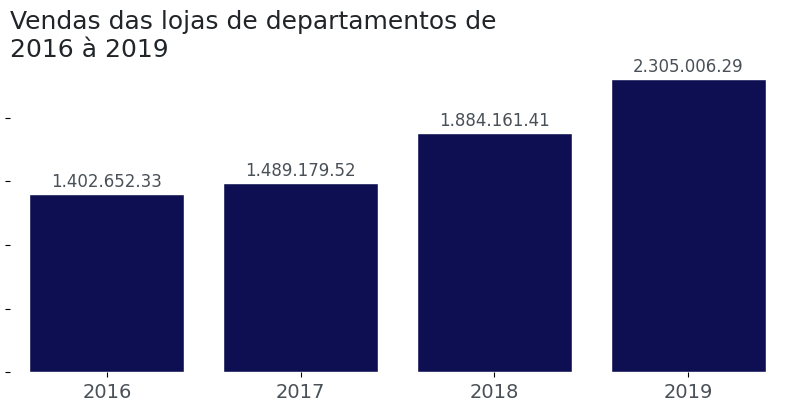

In [17]:
# Área di gráfico e tema da visualização
fig, ax = plt.subplots(figsize =(10,4))
sns.set_theme(style="white")

# Gerando o gráfico de colunas
ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y="vendas",color=AZUL1)

# Personalizando o Gráfico
ax.set_title("Vendas das lojas de departamentos de\n2016 à 2019", loc='left', fontsize=18,color=CINZA1)
ax.set_xlabel("")
ax.set_ylabel("")

ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2)

sns.despine(left=True, bottom =True)

# Escrevendo os valores de cada barra no gráfico
ax.set_yticklabels([])
for i, valor in enumerate(df_vendas_ano['vendas']):
  qtd = f'{valor:,.2f}'.replace(",",".")
  offset = 1e5
  ax.text(i, valor + offset, qtd, color=CINZA2, fontsize = 12, ha = "center",va = "center")

plt.show()


In [18]:
# Gerando a função para criar o gráfico de colunas

def grafico_vendas(cores: list = [AZUL2]):
  fig, ax = plt.subplots(figsize =(10,4))
  sns.set_theme(style="white")

  # Gerando o gráfico de colunas
  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y="vendas",palette=cores)

  # Personalizando o Gráfico
  ax.set_title("Vendas das lojas de departamentos de\n2016 à 2019", loc='left', fontsize=18,color=CINZA1)
  ax.set_xlabel("")
  ax.set_ylabel("")

  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2)

  sns.despine(left=True, bottom =True)

  # Escrevendo os valores de cada barra no gráfico
  ax.set_yticklabels([])
  for i, valor in enumerate(df_vendas_ano['vendas']):
    qtd = f'{valor:,.2f}'.replace(",",".")
    offset = 1e5
    ax.text(i, valor + offset, qtd, color=CINZA2, fontsize = 12, ha = "center",va = "center")


  return  ax



<ipython-input-18-e22e1ed6d673>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y="vendas",palette=cores)
<ipython-input-18-e22e1ed6d673>:8: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y="vendas",palette=cores)


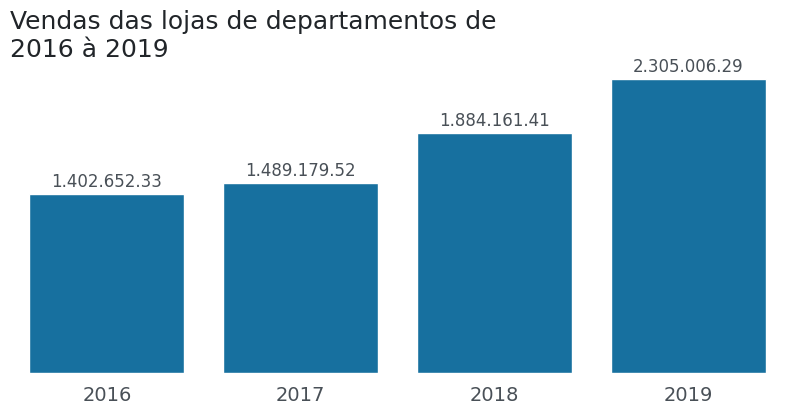

In [19]:
# chamando a função
ax = grafico_vendas()

plt.show()

<ipython-input-18-e22e1ed6d673>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y="vendas",palette=cores)


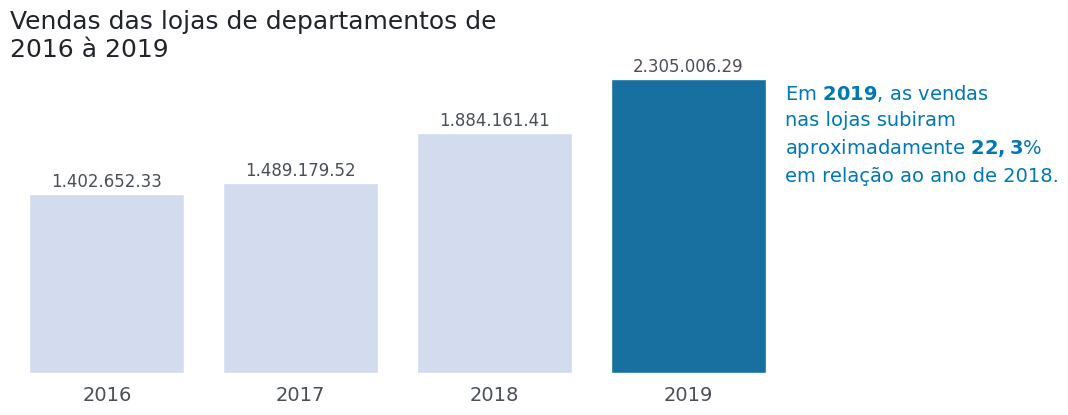

In [20]:
# Configurando o gáfico com parâmetros que potencializam a visualização dos dados
cores = []

for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano,'vendas'] == df_vendas_ano.vendas.max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)


# Definindo as cores do gráfico
ax = grafico_vendas(cores)

# Chamando a função do gráfico de colunas

# Anotando uma conlusão no gráfico

# Anotando uma conclusão no gráfico
ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

plt.show()

In [21]:
# Criando um df com os dados desejados
top_lucro = vendas.copy()
top_lucro = top_lucro[['tipo_produto','lucro']]

# agrupando os dados por tipo_produto, ordenando de maneira crescente pelo lucro e selecionando os 7 primeiros
top_lucro = top_lucro.groupby(['tipo_produto']).agg('sum').sort_values('lucro',ascending =False)

top_7 = top_lucro[:7]

top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


<ipython-input-22-3f71466b7cb8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_7, x='lucro',y = top_7.index, palette = cores)


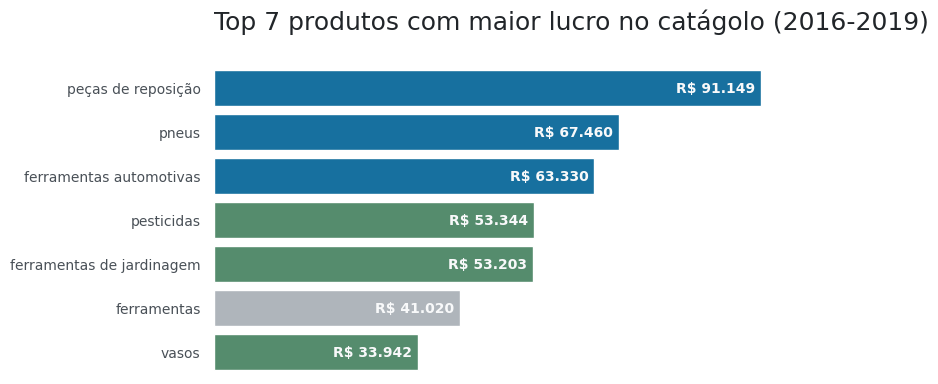

In [22]:
def grafico_top_7():
  #Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,4))
  fig.subplots_adjust(right=0.7)
  sns.set_theme(style='white')

  # definindo as cores do gráfico
  cores = [AZUL2, AZUL2,AZUL2,VERDE1,VERDE1,CINZA3,VERDE1]

  # gerando o gráfico de barras
  ax = sns.barplot(data = top_7, x='lucro',y = top_7.index, palette = cores)

  # Personalizando o gráfico
  ax.set_title('Top 7 produtos com maior lucro no catágolo (2016-2019)\n', fontsize = 18, color=CINZA1, loc = 'left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
  sns.despine(left =True, bottom = True)

  # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(top_7['lucro']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')
    offset = 1e3 # offset de 1.000
    ax.text(valor - offset, i ,qtd, color =CINZA5, fontsize = 10, fontweight='bold',ha='right',va='center')



  return ax

ax = grafico_top_7()
plt.show()

<ipython-input-22-3f71466b7cb8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_7, x='lucro',y = top_7.index, palette = cores)


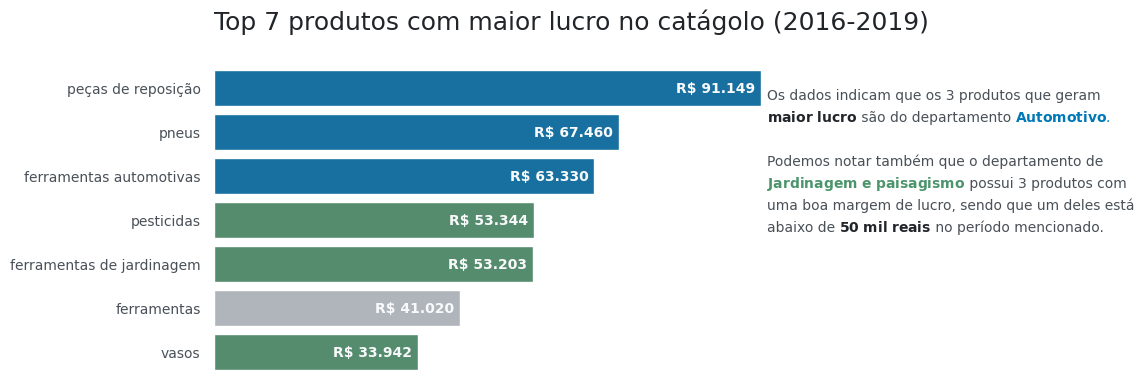

In [23]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 3.25,                                                       			 # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                       	           # linha 1                         		 # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                                     # linha 3
     [CINZA2],                       	          # linha 4
     [VERDE1, CINZA2],                   # linha 5
     [CINZA2],                                    # linha 6
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22,				 # espaçamento
    ax=ax,				 # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()





In [24]:
# Gráfico de colunas empilhadas

# Tratando os dados com os dados desejados
df_vendas_reg = vendas.copy()
df_vendas_reg = df_vendas_reg[['data_pedido','regiao','vendas']]

In [25]:
# Gerando uma coluna que represente apenas os anos puxando-os da ccoluna data pedido
df_vendas_reg['ano'] = df_vendas_reg.data_pedido.dt.year
df_vendas_reg.drop(labels = 'data_pedido',axis=1, inplace=True)

In [26]:
df_vendas_reg

,regiao,vendas,ano
0,Sudeste,890.66,2018
1,Sudeste,2488.59,2018
2,Sudeste,49.72,2018
3,Sul,3255.75,2017
4,Sul,76.04,2017
...,...,...,...
8935,Sudeste,123.22,2018
8936,Nordeste,271.97,2019
8937,Nordeste,700.75,2019
8938,Nordeste,85.83,2016


In [27]:
# O crosstab, ou tabela cruzada, é uma função da biblioteca pandas utilizada para analisar a relação entre duas variáveis categóricas.
#  Ela cria uma tabela com as variáveis categóricas como índices e colunas onde são exibidos os valores únicos de cada variável
#   nesse formato. Os valores da tabela são a combinação entre as duas variáveis.

# Ela é útil para fins de comparação entre as frequências de diferentes grupos, identificação de padrões ou associações entre variáveis.

# index: valores para agrupar nas linhas da tabela
# columns: valores para agrupar nas colunas da tabela
# values: valores da tabela a partir da função de agregação (aggfunc)
# aggfunc: função de agregação dos dados, por exemplo ”sum”
# normalize: normalização dos dados. Pode ser por colunas, linhas ou ambos.

# o grupby agrupa a tabela por uma variavel ja o crosstab agrupa mais de uma variavel
vendas_reg = pd.crosstab(index = df_vendas_reg.ano, columns = df_vendas_reg.regiao, values = df_vendas_reg.vendas, aggfunc='sum')

# Ajustando a tabela em ordem decrescente dos estados que mais executam vendas
vendas_reg = vendas_reg[['Sudeste','Nordeste','Centro-Oeste','Norte','Sul']]
vendas_reg

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
ano,,,,,
2016,739602.18,378521.83,121653.63,101580.57,61294.12
2017,803005.61,320804.28,149215.00,124164.47,91990.16
2018,1033836.21,401365.77,208068.71,108710.09,132180.63
2019,1146764.08,600738.87,257781.18,170311.34,129410.82


In [28]:
## Gerando a função para criar o gráfico de barras

def grafico_vendas_regiao():
  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]

  # Gerando o gráfico de colunas empilhadas
  ax = vendas_reg.plot(kind="bar", stacked=True, figsize=(10,6), color = cores)


  # Personalizando o gráfico
  ax.set_title('Vendas das lojas de departamentos por região\nde 2016 a 2019', loc='left', fontsize=22, color = CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
  ax.set_frame_on(False)

  # remover todos os ticks do eixo x e y
  ax.tick_params(axis="both", which="both", length=0)

  # Anotando uma conclusão no gráfico
  ax.text(3.35, 1.1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
  ax.text(3.35, 5.5e5,
        'das vendas nas lojas\n'
        'estão concentradas nas regiões\n'
        '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
        '$\\bf{Centro-Oeste}$ em 2019.',
        fontsize=14,
        linespacing=1.45,
        color=AZUL1)

  return ax






<Axes: title={'left': 'Vendas das lojas de departamentos por região\nde 2016 a 2019'}>

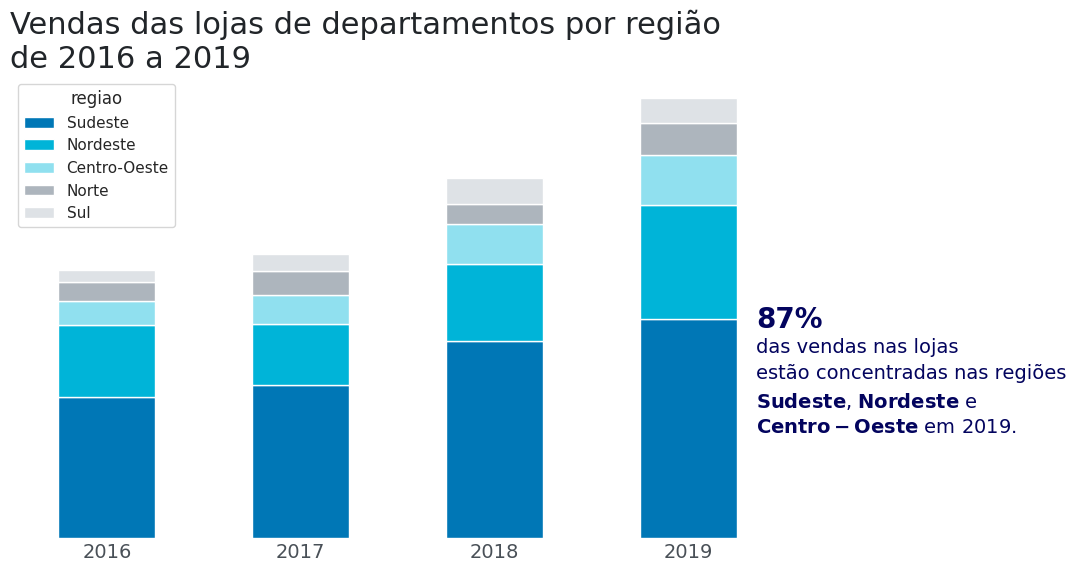

In [29]:
grafico_vendas_regiao()

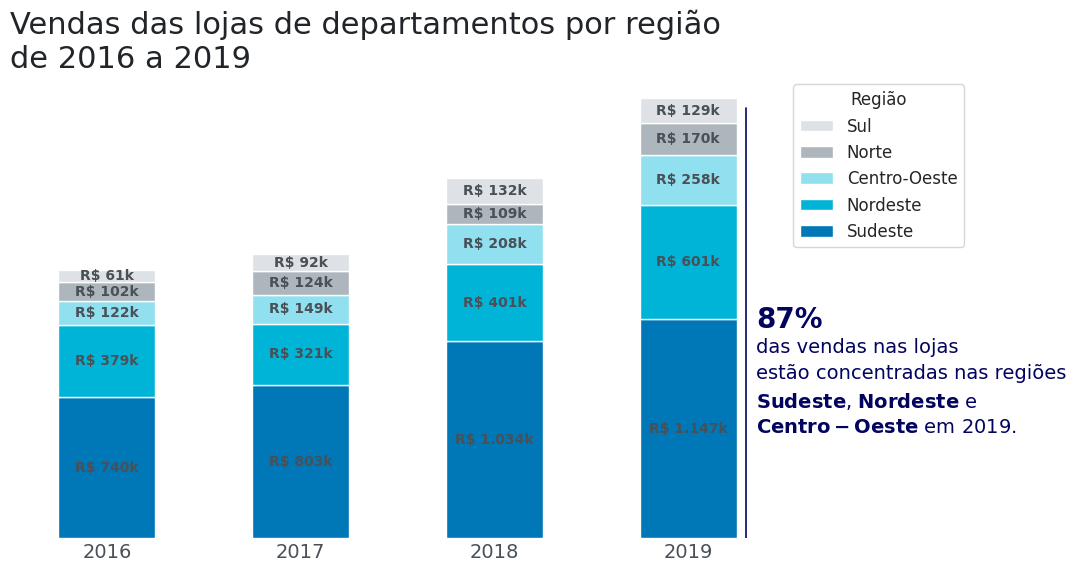

In [30]:
# Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_vendas_regiao()

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1,1), reverse = True, title = "Região", title_fontsize = 12, fontsize = 12)

# Adicionando os valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.0f}k'.replace(',','.') for valor in container]
  ax.bar_label(container, label_type='center', labels=labels, size =10, color = CINZA2, fontweight='bold')

# criando uma linha vertical
# largura linewidth
ax.axvline(x = 3.3, ymin = 0, ymax = 0.93, color = AZUL1, linewidth = 1.2 )

fig = ax.get_figure()



In [31]:
## Gerando a função para criar o gráfico de barras

def grafico_vendas_regiao():
  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]

  # Gerando o gráfico de colunas empilhadas
  ax = vendas_reg.plot(kind="bar", stacked=True, figsize=(10,6), color = cores)


  # Personalizando o gráfico
  ax.set_title('Vendas das lojas de departamentos por região\nde 2016 a 2019', loc='left', fontsize=22, color = CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
  ax.set_frame_on(False)

  # remover todos os ticks do eixo x e y
  ax.tick_params(axis="both", which="both", length=0)

  # Anotando uma conclusão no gráfico
  ax.text(3.35, 1.1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
  ax.text(3.35, 5.5e5,
        'das vendas nas lojas\n'
        'estão concentradas nas regiões\n'
        '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
        '$\\bf{Centro-Oeste}$ em 2019.',
        fontsize=14,
        linespacing=1.45,
        color=AZUL1)



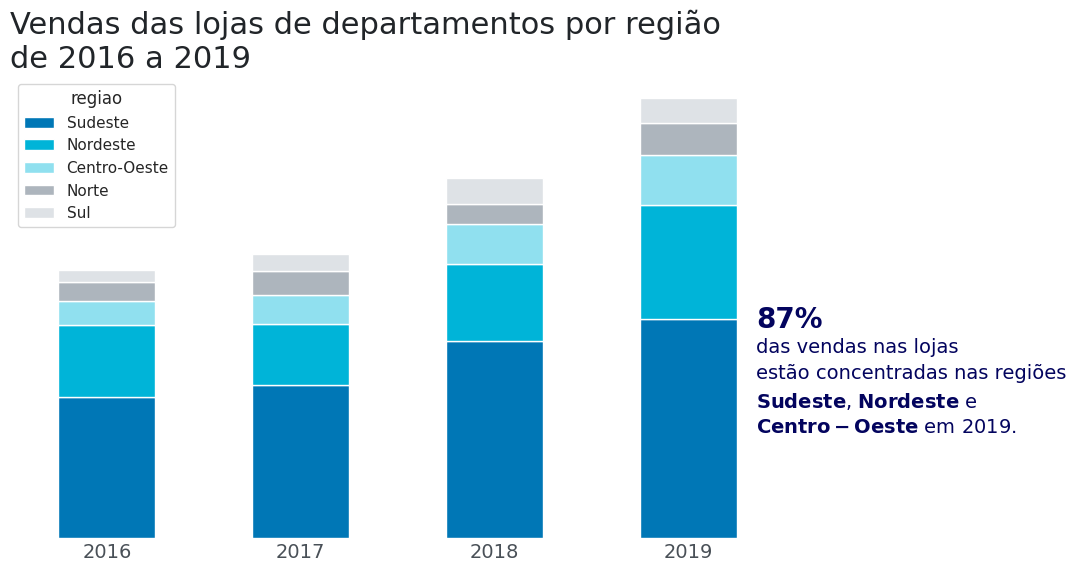

In [32]:
grafico_vendas_regiao()

In [33]:
# Tratando os dados para gerar a visualização
# Criando um df com os dados desejados

df_envio = vendas.copy()
df_envio = df_envio[['modo_envio','segmento_cliente' ]]

# criando uma tabela cruzada (crosstab) com os modos de envio divididos pelos clientes B2C e B2B
df_envio_seg = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente).sort_values('B2B')

df_envio_seg

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,207,288
Envio rápido,676,673
Econômica,829,906
Entrega padrão,2552,2809


In [34]:
# criando uma tabela cruzada (crosstab) com os modos de envio divididos pelos clientes B2C e B2B
df_envio_normalizado = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente, normalize='index')

df_envio_normalizado

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,0.418182,0.581818
Econômica,0.477810,0.522190
Entrega padrão,0.476031,0.523969
Envio rápido,0.501112,0.498888


In [35]:
# Função para escrita de texto utilizando diferentes cores. Não existe uma
# função nativa para isso. (Adaptado de https://github.com/empathy87/storytelling-with-data)
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


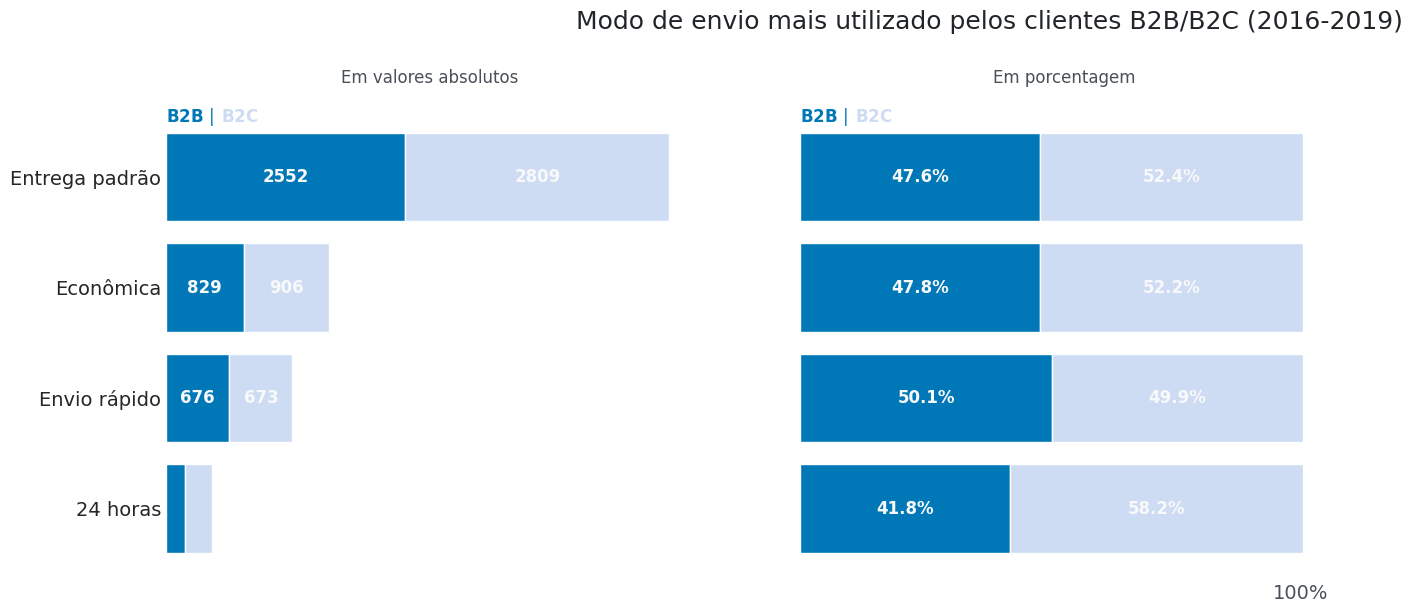

In [36]:
# cofigurando o gráfico com parâmetros que potencializam a visualização dos dados

fig, axs = plt.subplots(1,2,figsize=(15,6), sharey = True)

# Definindo as cores do gráfico
cores = [AZUL2, AZUL5]

# Gráficos 1 - Barras empilhadas
axs[0].barh(df_envio_seg.index,df_envio_seg['B2B'], color= cores[0])
axs[0].barh(df_envio_seg.index,df_envio_seg['B2C'], left=df_envio_seg['B2B'], color= cores[1])

axs[0].set_title('Em valores absolutos\n', color=CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[0].tick_params(axis='both',which='both',length=0)

texto_colorido(0,3.5,'$\\bf{B2B}$ | || $\\bf{B2C}$', cores=[cores], ax=axs[0], fontsize=12) # legenda

######################################


# GRÁFICO 2 - Barras empilhadas 100 %
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2B"], color = cores[0])
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2C"], left = df_envio_normalizado["B2B"], color = cores[1])
axs[1].set_title('Em porcentagem\n', color = CINZA2)
axs[1].set_xlabel('100%', color = CINZA2, size = 14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[1].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[1], fontsize=12) # legenda

# Título dos gráficos
fig.suptitle("Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n",
             fontsize=18, color=CINZA1, ha = 'right', x = 0.95, y = 1.05)



# Valores das barras
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig.show()


In [37]:
# Criando um df com os dados desejados
vendas_co = vendas.copy()
vendas_co = vendas_co[['data_pedido','regiao', 'estado', 'vendas']]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
vendas_co['ano'] = vendas_co.data_pedido.dt.year

# Selecionando apenas os dados do Centro-Oeste dos anos de 2017 e 2018 e removendo as colunas de data_pedido e região
vendas_co = vendas_co.query("regiao == 'Centro-Oeste' and (ano == 2017 or ano == 2018)")
vendas_co.drop(labels = ["data_pedido","regiao"], axis = 1, inplace = True)

vendas_co

,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [38]:
# Criando uma tabela cruzada (crosstab) com os valores de venda de cada ano por estado
vendas_co_ano = pd.crosstab(index = vendas_co.ano, columns = vendas_co.estado,
                         values = vendas_co.vendas, aggfunc = "sum")

vendas_co_ano


estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


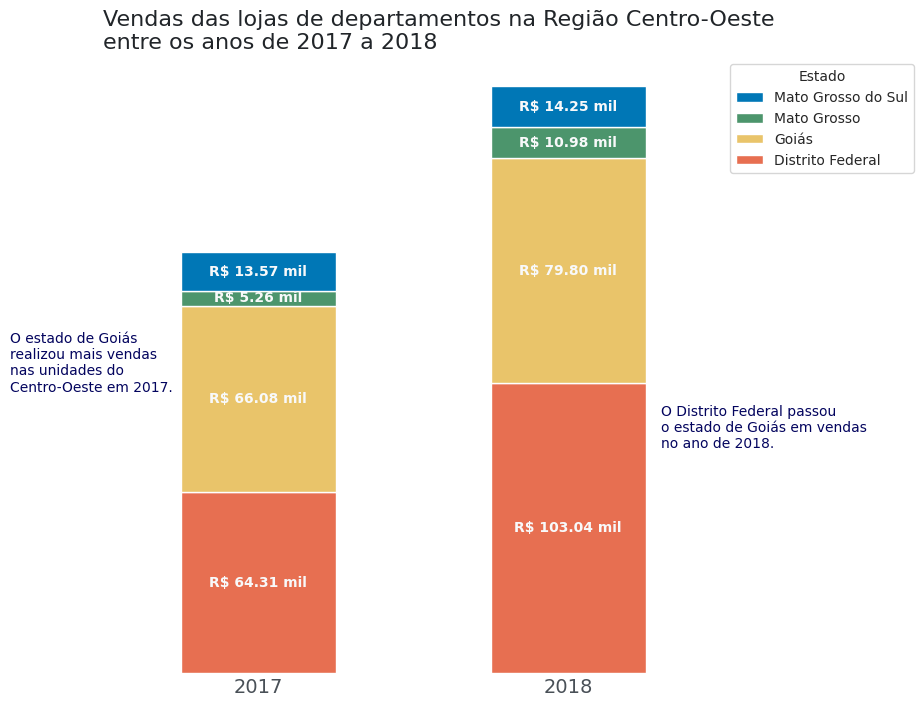

In [39]:
# Definindo as cores do gráfico
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

# Gerando o gráfico de colunas empilhadas
ax = vendas_co_ano.plot(kind="bar", stacked=True, figsize=(8,8), color = cores)

# Personalizando o gráfico
ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste\nentre os anos de 2017 a 2018',
             loc='left', fontsize=16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis="both", which ="both", length=0)

# Anotando uma conclusão no gráfico
ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1,1), reverse = True, title= "Estado", title_fontsize = 10, fontsize = 10)

# Adicionando os valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(",",".") for valor in container]
  ax.bar_label(container, label_type="center", labels = labels, size = 10, color = CINZA5, fontweight = "bold")

fig = ax.get_figure()


In [40]:
# Criando um df com os dados desejados
df_depart = vendas.copy()
df_depart = df_depart[['departamento','modo_envio']]

## Criando uma tabela cruzada (crosstab) com a frequência de modos de envio por departamento
df_depart = pd.crosstab(index = df_depart.departamento, columns = df_depart.modo_envio, normalize = "index")

df_depart

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [41]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


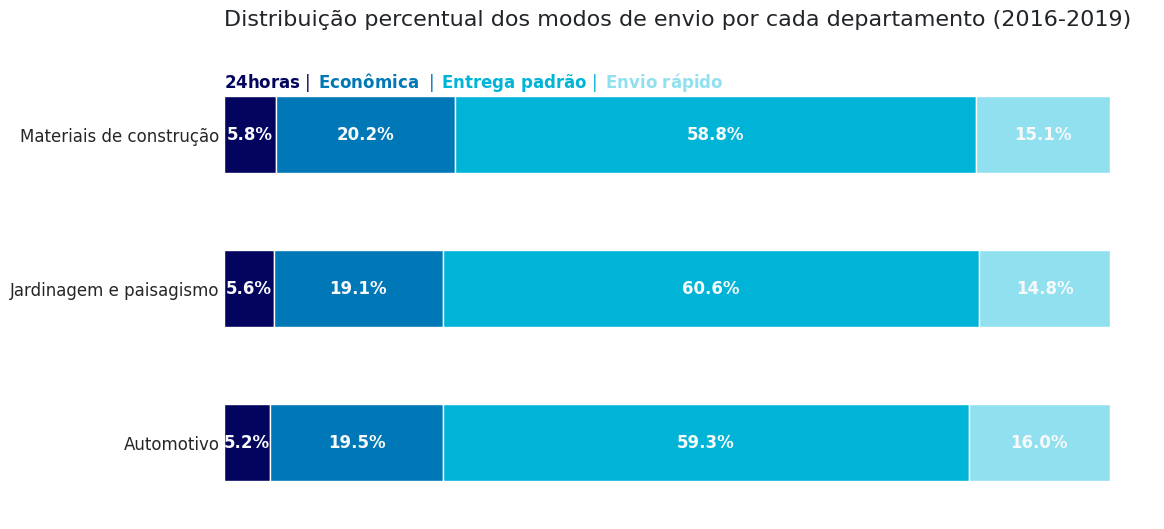

In [42]:
# Definindo as cores do gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# Gerando o gráfico de barras empilhadas
ax = df_depart.plot(kind="barh", stacked=True, figsize=(12,6), color = cores, legend = None)
ax.set_title("Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n",
             fontsize=16, loc="left", color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# legenda dos dados
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

# Valores das barras
for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig = ax.get_figure()


# Gráfico de linhas
Séries de tempo

In [43]:
# Criando um df com os dados desejados
df_sp = vendas.copy()
df_sp = df_sp.query('estado =="São Paulo"')[["data_pedido","vendas"]]

# Agrupando as vendas por trimestre e arredondando valores para milhares
df_sp.set_index('data_pedido', inplace=True)
df_sp = df_sp.resample('Q').agg('sum')


df_sp["vendas"] = round(df_sp["vendas"] / 1e3 , 2)
df_sp = df_sp.reset_index()
df_sp

,data_pedido,vendas
0,2016-03-31,41.87
1,2016-06-30,43.79
2,2016-09-30,154.91
3,2016-12-31,144.82
4,2017-03-31,36.13
5,2017-06-30,76.86
6,2017-09-30,129.76
7,2017-12-31,197.94
8,2018-03-31,44.26
9,2018-06-30,109.64


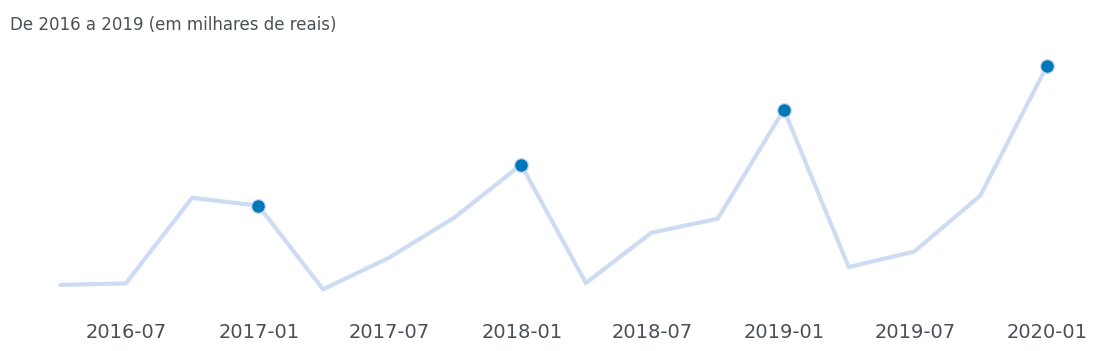

In [44]:
# gerando a função para o gráfico de linha
def grafico_vendas_sp_tri():


  # Área do gráfico e tema de visualização
  fig, ax = plt.subplots(figsize=(14,4))


  # gráfico de linha

  pontos_a_marcar = [True if mes == 12 else False for mes in df_sp["data_pedido"].dt.month]

  ax.plot(df_sp['data_pedido'], df_sp['vendas'],lw=3, color=AZUL5, marker="o", markersize = 10, markerfacecolor=AZUL2, markevery= pontos_a_marcar)

  #  ax.set_title('Vendas por trimestre no estado de São Paulo', fontsize = 18, color = CINZA1, loc='left')
  ax.text(0.3, 0.95, "De 2016 a 2019 (em milhares de reais)", transform=ax.transAxes, color= CINZA2, fontsize=12, ha='right', va='center')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.set_frame_on(False)
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2)

  # Removendo todos os ticks do eixo x e y
  ax.tick_params(axis='both', which='both',length=0)

  # Ajustes no eixo y
  # Descrevendo o limite mínimo e máximo do eixo y
  plt.ylim(0,400)

  return ax

ax = grafico_vendas_sp_tri()



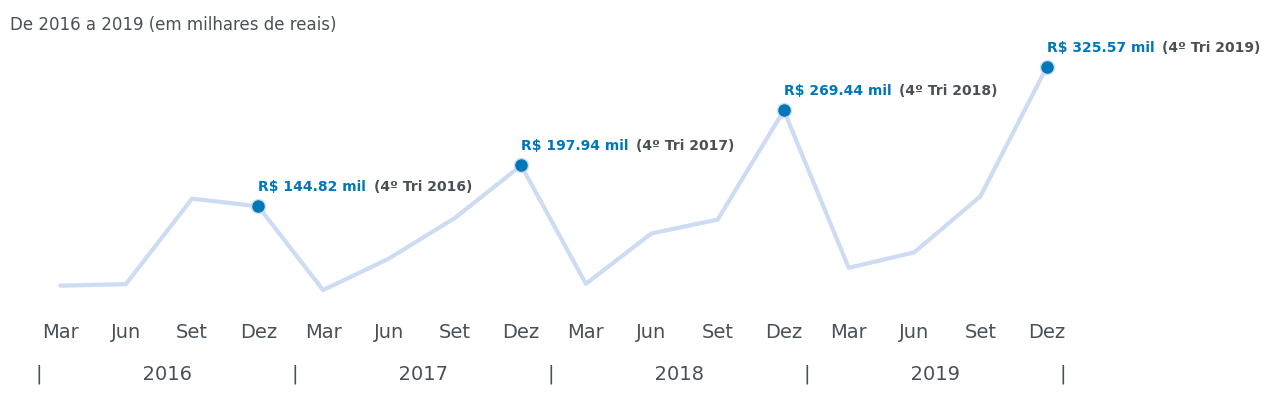

In [45]:
import matplotlib.dates as mdates

# Chamando a função que gera o gráfico de linha
ax = grafico_vendas_sp_tri()

# Ajustes no eixo x
# Definindo o intervalo em trimestres e colocando os nomes dos meses nos labels
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
x_labels = ["Mar","Jun","Set","Dez"] * 4
ax.set_xticks(df_sp.data_pedido)
ax.set_xticklabels(x_labels, ha = "center")

texto = [16*" " + str(i) + 16*" " for i in range(2016, 2020)]
ax.text(ax.get_xbound()[0] + 35, - 80, f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|', fontsize=14, color=CINZA2)

# Destacando os valores do 4º trimestre
ano = 0
for i in range(3, len(df_sp["vendas"]), 4):
  ax.text(x = ax.get_xticks()[i], y = df_sp["vendas"][i] + 20, s = f"R$ {df_sp['vendas'][i]} mil", color = AZUL2, weight = "bold", fontsize = 10)
  ax.text(x = ax.get_xticks()[i] + 160, y = df_sp["vendas"][i] + 20, s = f"(4º Tri {2016 + ano})", color = CINZA2, weight = "bold", fontsize = 10)
  ano +=1



fig = ax.get_figure()

In [46]:
# Gráfico de linha

df_regiao = vendas.copy()
df_regiao = df_regiao[["regiao", "data_pedido", "vendas"]]


df_regiao = pd.crosstab(index = df_regiao.data_pedido, columns = df_regiao.regiao, values = df_regiao.vendas, aggfunc="sum")


df_regiao = df_regiao[["Sudeste", "Nordeste", "Centro-Oeste", "Norte", "Sul"]]
df_regiao


regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-01-04,55.92,NaN,NaN,NaN,NaN
2016-01-05,979.42,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,66.42,NaN,NaN
2016-01-07,14940.66,43.44,NaN,NaN,NaN
2016-01-08,296.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,NaN,2552.32,152.15,NaN,10.64
2019-12-28,603.96,NaN,NaN,NaN,NaN
2019-12-29,677.65,4079.73,NaN,456.94,NaN


In [47]:
df_regiao = df_regiao.resample('Q').agg('sum')
df_regiao = round(df_regiao/1e3, 2)
df_regiao


regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-03-31,70.18,41.73,16.80,9.31,1.51
2016-06-30,122.72,87.41,30.83,24.68,10.62
2016-09-30,226.43,158.12,39.61,21.94,11.97
2016-12-31,320.27,91.27,34.41,45.65,37.19
2017-03-31,127.89,61.58,5.90,35.25,4.75
2017-06-30,161.54,54.93,16.96,13.35,21.23
2017-09-30,206.29,91.60,48.82,48.71,21.68
2017-12-31,307.28,112.69,77.54,26.86,44.34
2018-03-31,120.56,92.40,29.30,39.03,6.95


In [48]:
# Gerando gráfico dinamico

# importando a biblioteca
import plotly.express as px


fig = px.line(df_regiao, x=df_regiao.index, y=df_regiao.columns, markers = True, labels={"regiao": "Região"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3])

# Código omitido
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                   title_text='Faturamento da loja de departamentos por trimestre' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)


fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")


labels = ['T1<br>2016', 'T2<br>2016', 'T3<br>2016', 'T4<br>2016',
          'T1<br>2017', 'T2<br>2017', 'T3<br>2017', 'T4<br>2017',
          'T1<br>2018', 'T2<br>2018', 'T3<br>2018', 'T4<br>2018',
          'T1<br>2019', 'T2<br>2019', 'T3<br>2019', 'T4<br>2019']
fig.update_xaxes(ticktext = labels, tickvals=df_regiao.index)


fig.show()


In [49]:
# Personalizando o texto informativo (hover)


# Dados ao passar o mouse
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Faturamento:</b> %{y}")
#fig.update_layout(hovermode="closest")    # para exibir apenas do dado que passamos o mouse
#fig.update_layout(hovermode="x")          # para exibir todos os dados do período em cada linha
fig.update_layout(hovermode="x unified")  # para exibir o resumo de todos os dados no período

fig.show()




#### **Base de dados 1 - Amostra dos volumes do amaciante**


graficos de distribuição

In [50]:
# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/volume_amaciante.csv")

vol_amaciante.head()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


In [51]:
# Verificando a estatística descritiva das amostras de volume em forma de tabela
vol_amaciante.describe()

,Volume
count,1000.00000
mean,999.98970
std,0.48553
min,998.30000
25%,999.70000
50%,1000.00000
75%,1000.30000
max,1001.50000


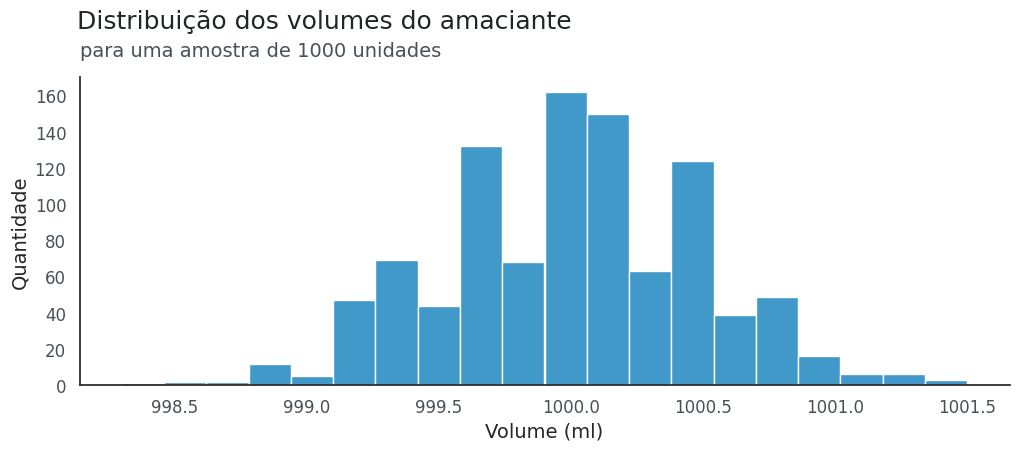

In [52]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(12,4))
sns.set_theme(style="white")

# Gerando o histograma sem estimativa de densidade
#ax = sns.histplot(data = vol_amaciante, x = "Volume", binwidth = 0.1, color = AZUL2)
ax = sns.histplot(data = vol_amaciante, x = "Volume", bins = 20, color = AZUL2)

# Personalizando o gráfico
plt.suptitle('Distribuição dos volumes do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.535, y = 1.05)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Volume (ml)', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine() # tirando as bordas


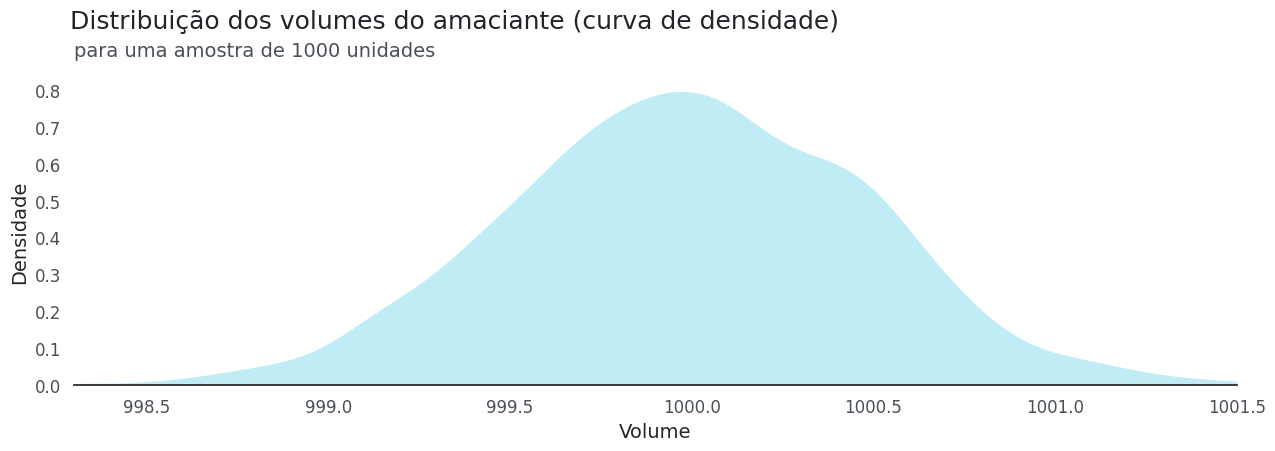

In [53]:
# Gráfico de densidade

def grafico_densidade():

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(15,4))
  sns.set_theme(style='white')

  # Gerando a curva de densidade
  ax = sns.kdeplot(data = vol_amaciante, x = "Volume", color = AZUL3,lw = 0,fill=True  )

  # Personalizando o gráfico
  plt.suptitle('Distribuição dos volumes do amaciante (curva de densidade)', size=18, color=CINZA1, ha = 'right', x = 0.635, y = 1.05)
  plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
  ax.set_xlabel('Volume', fontsize = 14)
  ax.set_ylabel('Densidade', fontsize = 14)
  ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.set_xlim(vol_amaciante.Volume.min(), vol_amaciante.Volume.max())
  sns.despine(left = True)

  return ax



ax = grafico_densidade()

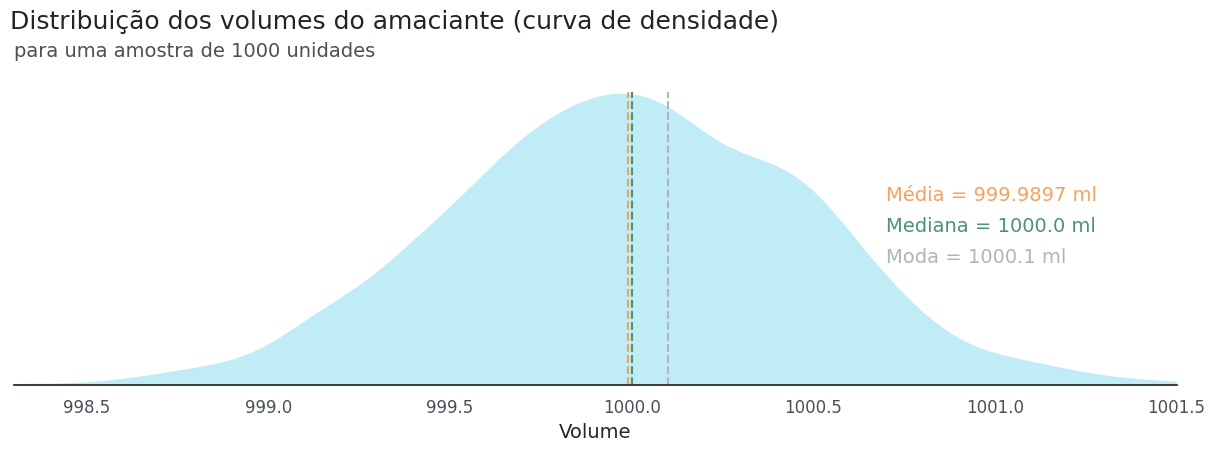

In [54]:
# Configurando o gráfico com parâmetros que potencializam a visualização dos dados


# Chamando a função que gera o gráfico de densidade
ax = grafico_densidade()

## Personalizando o gráfico
ax.set_ylabel('')
ax.set_yticklabels([])


# Gerando as linhas de média, mediana e moda
estat = vol_amaciante.Volume.mean(), vol_amaciante.Volume.median(), vol_amaciante.Volume.mode()[0]
desc = ["Média", "Mediana", "Moda"]

# Definindo as cores de cada estatística descritiva
cores = [LARANJA1, VERDE1, CINZA3]


# gerando 1 ou mais linhas na vertical a partir de um valor de x
ax.vlines(x = estat, ymin = 0, ymax = 0.8, colors = cores, linestyles = "--")


# Anotando os valores de média, mediana e moda no gráfico
for i in range(len(estat)):
  ax.text(0.75, (0.6 - i/10), f'{desc[i]} = {estat[i]} ml', fontsize=14, color = cores[i], transform=ax.transAxes)

fig = ax.get_figure()


Boxplot

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1477: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



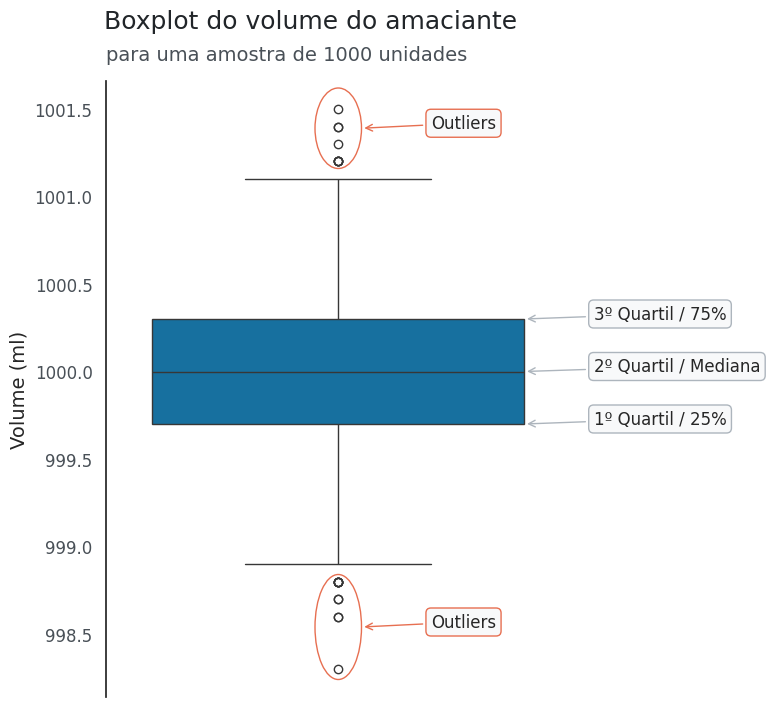

In [55]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns


# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")


# Gerando o boxplot
ax = sns.boxplot(data = vol_amaciante, y = "Volume", orient = "v", color = AZUL2)


# Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)



# Gerando outros elementos visuais (elipses dos outliers)
y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.27), width = 0.1, height = 0.46, color=VERMELHO1, fill=False)
outlier_inf = Ellipse((0, y_min + 0.4), width = 0.1, height = 0.6, color=VERMELHO1, fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)


# Adicionando a explicação dos elementos de um boxplot
ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.27), xycoords='data',    # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),         # caixa de texto
            xytext=(50, 0), textcoords='offset points',                   # posição do texto
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))            # propriedades da seta

ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))

# Adicionando os quartis

ax.annotate("1º Quartil / 25%", xy=(0.4, vol_amaciante.quantile(.25)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("2º Quartil / Mediana", xy=(0.4, vol_amaciante.median()), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("3º Quartil / 75%", xy=(0.4, vol_amaciante.quantile(.75)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))



plt.show()


In [56]:
vol_amaciante

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8
...,...
995,1000.0
996,1000.4
997,999.9
998,1000.0


In [57]:
IIQ = vol_amaciante.Volume.quantile(0.75) - vol_amaciante.Volume.quantile(0.25)
IIQ

limite_superior = vol_amaciante.Volume.quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante.Volume.quantile(0.25) - 1.5 * IIQ
print(f"Limite superior = {limite_superior}", f"\nLimite inferior = {limite_inferior}")



Limite superior = 1001.1999999999998 
Limite inferior = 998.8000000000002


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dados = pd.read_csv("/content/drive/MyDrive/Alura_ciencia_e_dados/Avancando_em_Data_Science_com_Python/Data_visualization_graficos_de_comparacao_e_distribuicao/dados/pop_idade.csv")
dados.head()


,idade
0,39
1,33
2,41
3,50
4,32


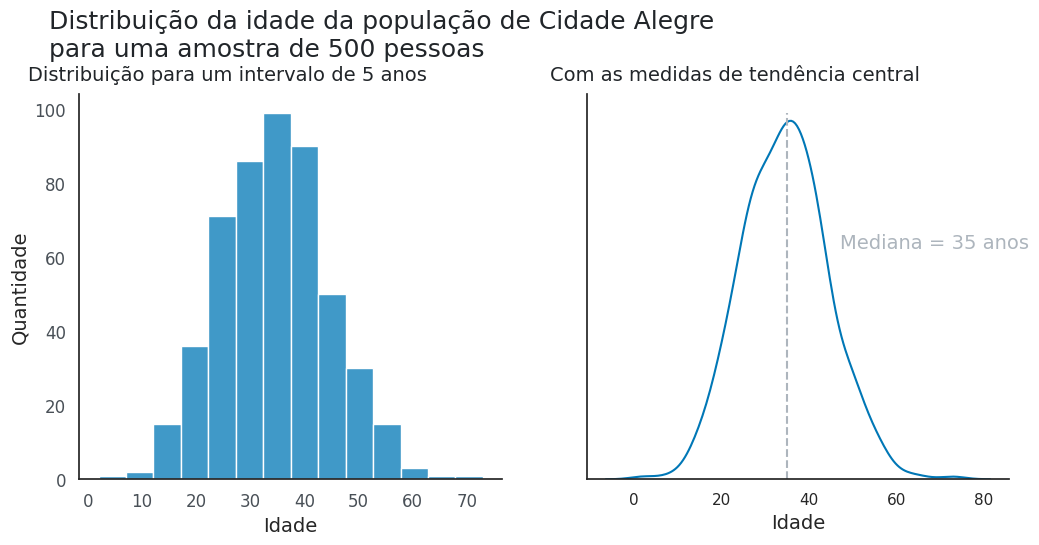

In [59]:
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.set_theme(style="white")

# Título dos gráficos
fig.suptitle("Distribuição da idade da população de Cidade Alegre \npara uma amostra de 500 pessoas",
             fontsize=18, color=CINZA1, x = 0.1, y = 1.05, ha="left")

# GRÁFICO 1 - Histograma de Colunas

sns.histplot(ax = axs[0], data = dados, x = "idade", binwidth = 5, color = AZUL2)
axs[0].set_title('Distribuição para um intervalo de 5 anos', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[0].set_xlabel('Idade', fontsize = 14)
axs[0].set_ylabel('Quantidade', fontsize = 14)
axs[0].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[0].xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

# GRÁFICO 2 - Histograma de Linhas

sns.kdeplot(ax = axs[1], data = dados, x = "idade", color = AZUL2)
axs[1].set_title('Com as medidas de tendência central', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[1].set_xlabel('Idade', fontsize = 14)
axs[1].set_ylabel('')
axs[1].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[1].set_yticklabels([])
sns.despine()

# gerando a linha que define a mediana e anotando seu valor
axs[1].vlines(x = dados.idade.median(), ymin = 0, ymax = 0.04, colors = CINZA3, linestyles = "--")
axs[1].text(0.6, 0.6, f'Mediana = {int(dados.idade.median())} anos', fontsize=14, color = CINZA3, transform=axs[1].transAxes)

plt.show()


In [60]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/volume_amaciante.csv")


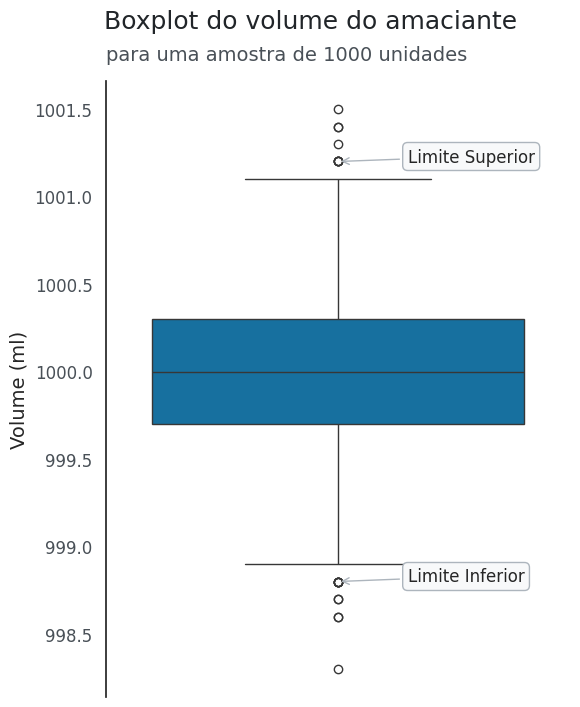

In [61]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")

# Gerando o boxplot
ax = sns.boxplot(data = vol_amaciante, y = "Volume", orient = "v", color = AZUL2)

## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Calculando o intervalo interquartil(IIQ) e os limites máximos e mínimos
IIQ = vol_amaciante["Volume"].quantile(0.75) - vol_amaciante["Volume"].quantile(0.25)
limite_superior = vol_amaciante["Volume"].quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante["Volume"].quantile(0.25) - 1.5 * IIQ

# Adicionando a anotação dos limites superiores e inferiores de um boxplot
ax.annotate("Limite Superior", xy=(0, limite_superior), xycoords='data',  # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),                          # caixa de texto
            xytext=(50, 0), textcoords='offset points',                                 # posição do texto
            arrowprops=dict(arrowstyle="->", color=CINZA3))                             # propriedades da seta

ax.annotate("Limite Inferior", xy=(0, limite_inferior), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

plt.show()


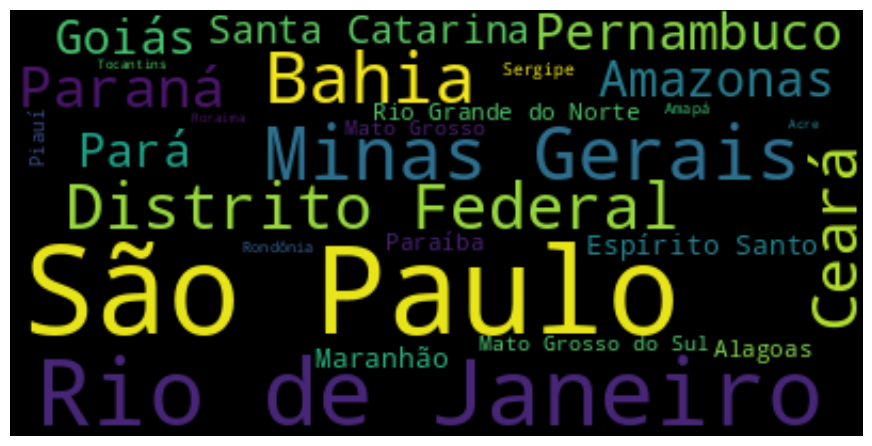

In [62]:
# Nuvem de palavras dos estados
# Primeiro importamos as bibliotecas que vamos utilizar.
# Um destaque para o método WordCloud()da biblioteca wordcloud
# responsável por gerar a nuvem de palavras e a função Image da biblioteca PIL(pillow)
# para podermos utilizar imagens dentro na nuvem de palavras (no exemplo a seguir).



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image



# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Gerando um dicionário de frequências
dic = dict(vendas["estado"].value_counts())

# Criar um objeto wordcloud
wordcloud = WordCloud()

# Cria uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = dic)

fig, ax = plt.subplots(figsize = (11, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
ax.axis("off")    # retirando bordas e ticks

plt.show()


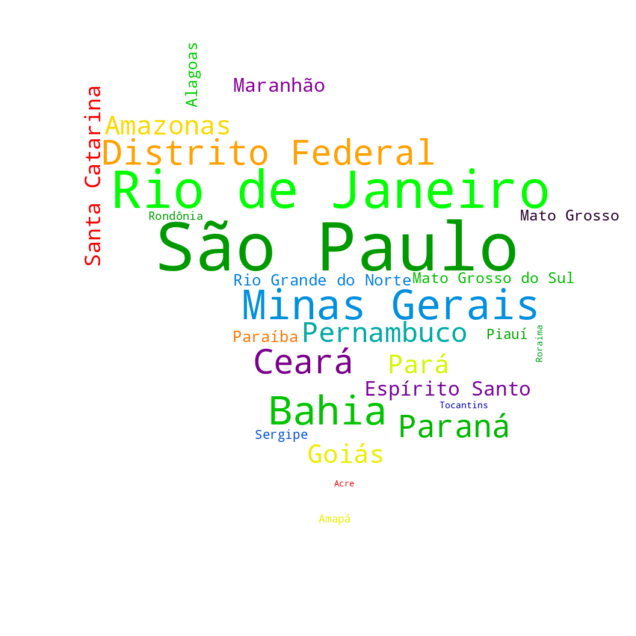

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Gerando um dicionário de frequências
dic = dict(vendas["estado"].value_counts())

# Abrir a imagem com o mapa do Brasil e transformá-lo em um array do numpy
# o sinal til(~) inverte a máscara deixando o espaço dentro do mapa como local de desenho
image_mask = ~np.array(Image.open('/content/drive/MyDrive/Alura_ciencia_e_dados/Avancando_em_Data_Science_com_Python/Data_visualization_graficos_de_comparacao_e_distribuicao/dados/mapa_br.png'))



# Criar um objeto wordcloud
wordcloud = WordCloud(background_color = 'white',       # cor de fundo
                      width = image_mask.shape[1],      # largura
                      height = image_mask.shape[0],     # altura
                      mask = image_mask,                # imagem
                      contour_color = 'white',          # cor do contorno
                      colormap = 'nipy_spectral_r')     # cor das palavras

# Cria uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = dic)

fig, ax = plt.subplots(figsize = (10, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
ax.axis("off")    # retirando bordas e ticks
plt.show()


In [ ]:
# Embalagem de sabão em pó

# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
import pandas as pd
df_medidas = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")

df_medidas.sample(5)


In [66]:
# Verificando a estatística descritica das amostras das medidas da embalagem  de sabão em pó em forma de tabela
df_medidas.describe()

,comprimento,altura,largura
count,1000.000000,1000.00000,1000.000000
mean,20.025740,14.97233,5.000050
std,0.059189,0.06294,0.051081
min,19.910000,14.69000,4.840000
25%,19.980000,14.93000,4.970000
50%,20.020000,14.99000,5.000000
75%,20.060000,15.02000,5.030000
max,20.250000,15.09000,5.190000


In [69]:
df_medidas.sample(5)

,comprimento,altura,largura,amostra
805,19.95,15.05,5.05,E
91,20.13,14.86,4.96,A
718,20.10,14.90,5.19,D
535,20.03,14.97,4.93,C
324,20.04,14.95,4.90,B


<ipython-input-73-c20ccccdf1a1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




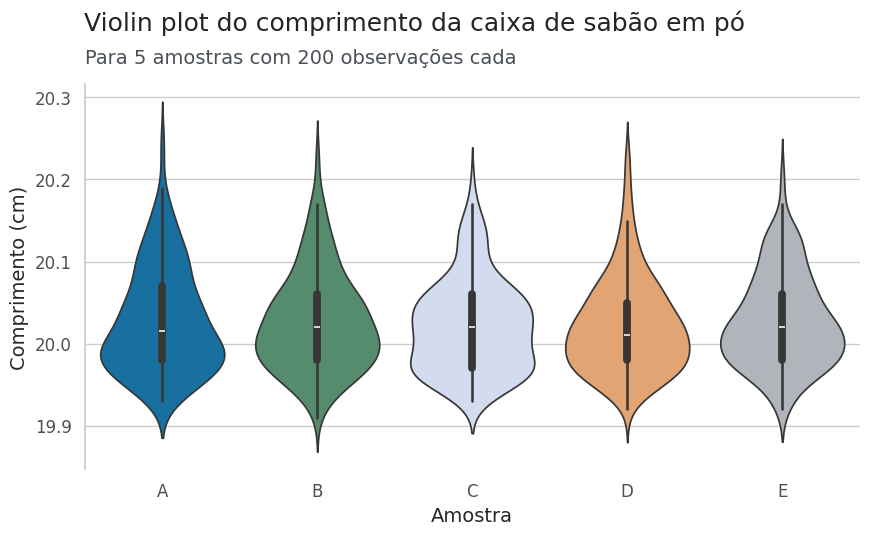

In [73]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style = 'whitegrid')

# Gerando o violinplot de comprimento altura e largura
ax = sns.violinplot(data = df_medidas, x = 'amostra', y='comprimento', palette = [AZUL2,VERDE1,AZUL5,LARANJA1,CINZA3])

# Personalizando o gráfico
plt.suptitle('Violin plot do comprimento da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.785, y = 1.03)
plt.title('Para 5 amostras com 200 observações cada', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Amostra',  fontsize = 14)
ax.set_ylabel('Comprimento (cm)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

plt.show()

In [74]:
df_a = df_medidas.query('amostra == "A"')[['comprimento','altura']]
df_a.head()

,comprimento,altura
0,20.11,14.89
1,20.13,14.86
2,19.99,15.01
3,20.06,14.93
4,19.99,15.01


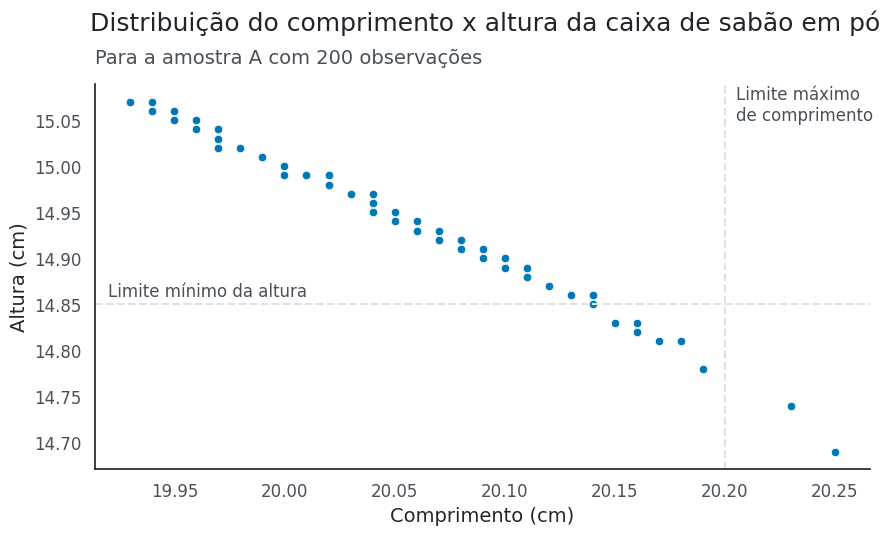

In [77]:
# Gerando a função que cria o gráfico de dispersão

def grafico_dispersao(map_cores: list=[AZUL2], pct: float=0.01):
  # Importando as bibliotecas
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,5))
  sns.set_theme(style="white")

  # Gerando o gráfico de dispersão
  ax = sns.scatterplot(data=df_a, x="comprimento", y="altura", color=map_cores)

  # Personalizando o gráfico
  plt.suptitle('Distribuição do comprimento x altura da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.91, y = 1.03)
  plt.title('Para a amostra A com 200 observações', fontsize=14, color=CINZA2, pad = 15, loc = "left")
  ax.set_xlabel('Comprimento (cm)',  fontsize = 14)
  ax.set_ylabel('Altura (cm)', fontsize = 14)
  ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  sns.despine()

  # Desenhando a linha horizontal com o límite mínimo de altura desejado
  ax.text(19.92, 14.855, 'Limite mínimo da altura', fontsize=12, color = CINZA2, va = "bottom")
  plt.axhline(y = 15 * (1 - pct), color = CINZA4, linestyle='--')

  # Desenhando a linha vertical com o límite mínimo de comprimento desejado
  ax.text(20.205, 15.05, 'Limite máximo\nde comprimento', fontsize=12, color = CINZA2, ha="left")
  plt.axvline(x = 20 * (1 + pct), color = CINZA4, linestyle='--')


  return ax

ax = grafico_dispersao()

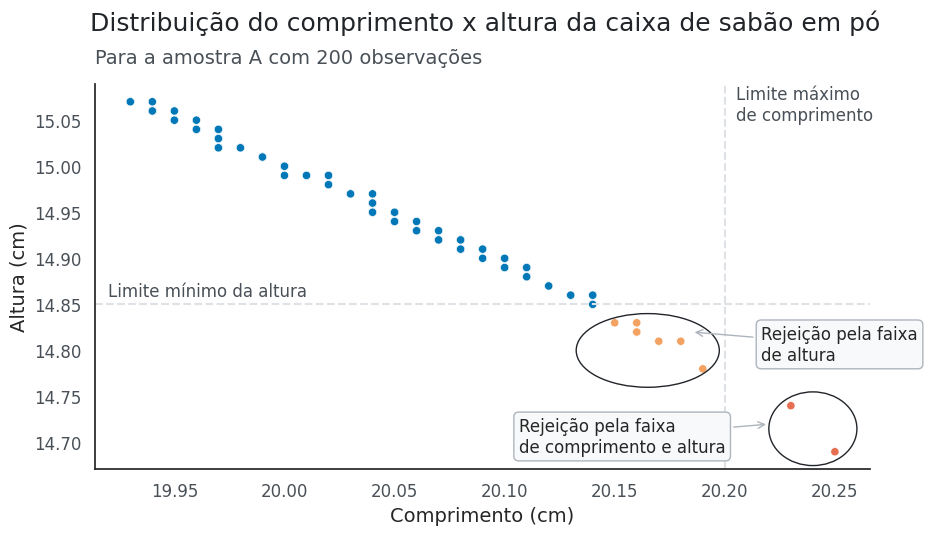

In [78]:
# Importando as bibliotecas
from matplotlib.patches import Ellipse
import numpy as np

# Definindo as cores do gráfico
cores = [VERMELHO1, LARANJA1, AZUL2]

# Gerando o gráfico de dispersão e rejeitando os valores fora da faixa requisitada (1%)
pct = 0.01
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_a["comprimento"]]
rejeita_alt = [True if (a > 15*(1+pct) or a < 15*(1-pct)) else False for a in df_a["altura"]]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_alt, cores[1], cores[2]))
ax = grafico_dispersao(map_cores, pct)

# Selecionando as áreas de rejeição
rej_comp = Ellipse((20.165, 14.80), width = 0.065, height = 0.08, color=CINZA1, fill=False)
rej_alt = Ellipse((20.24, 14.715), width = 0.04, height = 0.08, color=CINZA1, fill=False)
ax.add_patch(rej_comp)
ax.add_patch(rej_alt)

ax.annotate("Rejeição pela faixa\nde altura", xy=(20.185, 14.82), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("Rejeição pela faixa\nde comprimento e altura", xy=(20.22, 14.72), xycoords='data',
             bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
             xytext=(-180, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color=CINZA3))

fig = ax.get_figure()


In [80]:
df_medidas = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")
df_b = df_medidas.query('amostra == "B"')[["comprimento", "largura"]]

df_b.head()

,comprimento,largura
200,19.97,5.10
201,20.13,4.94
202,20.12,4.95
203,20.04,4.96
204,19.97,4.98


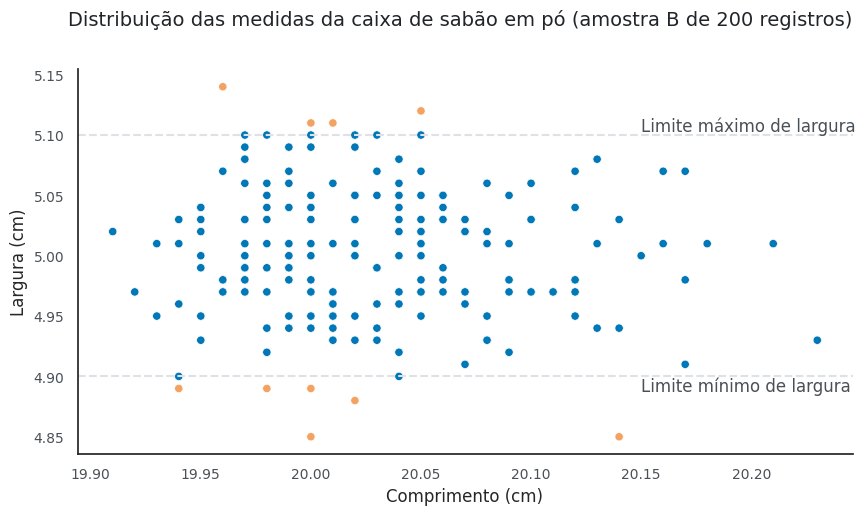

In [81]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="white")

# Definindo as cores do gráfico e a porcentagem de rejeição
cores = [VERMELHO1, LARANJA1, AZUL2]
pct = 0.02

# Mapeando as cores para a faixa requisitada (2%)
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_b["comprimento"]]
rejeita_larg = [True if (a > 5*(1+pct) or a < 5*(1-pct)) else False for a in df_b["largura"]]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_larg, cores[1], cores[2]))

# Gerando o gráfico de dispersão
ax = sns.scatterplot(data = df_b, x="comprimento", y = "largura", color = map_cores)

# Personalizando o gráfico
plt.suptitle('Distribuição das medidas da caixa de sabão em pó (amostra B de 200 registros)', size=14, color=CINZA1, ha = 'right', x = 0.9, y = 1)
ax.set_xlabel('Comprimento (cm)', fontsize = 12)
ax.set_ylabel('Largura (cm)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine()

### Desenhando as linhas verticais com os limites mínimos e máximo de altura desejada
ax.text(20.15, 5.1, 'Limite máximo de largura', fontsize=12, color = CINZA2, ha="left", va = "bottom")
plt.axhline(y = 5 * (1 + pct), color = CINZA4, linestyle='--')
ax.text(20.15, 4.9, 'Limite mínimo de largura', fontsize=12, color = CINZA2, ha="left", va = "top")
plt.axhline(y = 5 * (1 - pct), color = CINZA4, linestyle='--')

plt.show()
